In [111]:
import pandas as pd
import numpy as np
import math
import operator

In [112]:
iris=pd.read_csv("Iris.csv")

In [113]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [115]:
iris.shape[0] #gives number of rows 
iris.shape[1] #gives number of columns

6

### Defining KNN Model

In [116]:
from sklearn import preprocessing

In [117]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [118]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [119]:
Y = iris[['Species']].values
Y[0:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.63, random_state=1)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (55, 4) (55, 1)
Test set: (95, 4) (95, 1)


In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [123]:
Ks = 15
mean_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
mean_acc

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([0.91578947, 0.90526316, 0.95789474, 0.91578947, 0.93684211,
       0.93684211, 0.96842105, 0.96842105, 0.96842105, 0.97894737,
       0.97894737, 0.94736842, 0.94736842, 0.92631579])

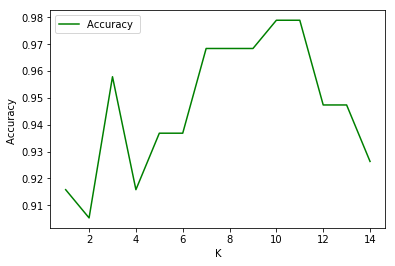

In [124]:
from matplotlib import pyplot as plt
plt.plot(range(1,Ks),mean_acc,color='g')
plt.legend(('Accuracy ',)) #'+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.show()